In [102]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
X_df = pd.read_parquet('train_12.parquet')
y_df = pd.read_parquet('segment_12.parquet')

In [3]:
df = pd.merge(X_df, y_df, on='ID', how='inner')

In [4]:
cols_to_drop = ['기준년월', 'ID']
df = df.drop(columns=cols_to_drop)

In [5]:
df

,이용금액_R3M_신용체크,입회경과개월수_신용,_1순위카드이용금액,회원여부_이용가능_카드론,이용거절여부_카드론,최종카드발급경과월,이용금액_R3M_신용,_1순위카드이용건수,이용금액_R3M_체크,직장시도명,...,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,잔액_한도소진율,증감율_카드론_분기,증감율_일시불_분기,증감율_체크_분기,증감율_카드론_전월,변동률_RV평잔,Segment
0,-454,71,3027,0,0,27,-454,25,0,9,...,0.000000,0.878859,1.398627,3.407027,0.143423,-0.609648,0.086480,0.048726,0.321733,D
1,7089,16,7259,1,0,23,7089,31,0,1,...,0.000000,0.000000,0.000000,5.196375,0.143423,-0.597498,0.086480,0.048726,0.214949,E
2,27336,128,26968,0,0,25,27336,52,0,9,...,-0.115879,0.187467,-1.198788,4.332080,0.143423,-0.154887,0.086480,0.048726,-2.839702,C
3,4270,31,4807,0,0,22,4270,27,0,8,...,0.000000,0.781401,1.282494,6.248569,0.143423,0.593422,0.086480,0.048726,0.321733,D
4,9385,6,3989,1,0,20,7387,-2,1997,4,...,0.000000,0.762016,0.986860,-2.056257,0.143423,4.964378,-0.654283,0.048726,0.321733,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,10755,209,5640,1,0,39,7267,3,3488,11,...,0.000000,0.762016,0.986860,-1.890821,0.143423,0.199105,-0.212206,0.048726,0.321733,E
399996,27636,17,26357,1,0,24,27636,38,0,12,...,0.000000,1.377071,2.533815,-0.785374,0.143423,-1.552244,0.086480,0.048726,0.321733,D
399997,23187,115,17171,0,0,18,23187,33,0,9,...,0.000000,0.000000,0.000000,-0.233282,0.143423,-0.211614,0.086480,0.048726,0.321733,C
399998,0,71,0,1,0,27,0,-2,0,8,...,0.000000,0.762016,0.986860,-1.998546,0.143423,0.199105,0.086480,0.048726,0.321733,E


In [6]:
# 1. 전체 데이터프레임에서 A와 B만 추출
df_ab = df[df['Segment'].isin(['A', 'B'])].copy()  # copy()는 경고 방지용

# 2. X, y 분리
X = df_ab.drop(columns=['Segment'])
y = df_ab['Segment']

In [7]:
y

2898      A
5253      A
8128      A
10808     A
14951     A
         ..
376373    A
378479    A
390620    B
393027    A
393888    A
Name: Segment, Length: 186, dtype: object

In [8]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# 타겟 값 y 인코딩
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [106]:
y

2898      A
5253      A
8128      A
10808     A
14951     A
         ..
376373    A
378479    A
390620    B
393027    A
393888    A
Name: Segment, Length: 186, dtype: object

In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [11]:
X_val_scaled

array([[ 0.14608377, -0.81367521,  0.24139448, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10950553,  0.20512821, -0.35668403, ...,  0.        ,
         0.        , -0.2696529 ],
       [-1.73719131,  0.28717949, -1.69248122, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.35008308, -1.34700855,  0.76411721, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1135163 , -0.85470085,  0.01999888, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00556924,  0.21880342,  0.01804699, ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled   = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

In [13]:
# 1. A/B만 남긴 후 y는 반드시 pandas Series 상태 유지
df_ab = df[df['Segment'].isin(['A', 'B'])].copy()
X = df_ab.drop(columns=['Segment'])
y = df_ab['Segment']

# 2. train/val 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. 스케일링 (결과를 다시 DataFrame으로)
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val), columns=X.columns, index=X_val.index)

# 4. 라벨 인코딩 (A → 0, B → 1) → Series로 유지!
y_train_enc = (y_train == 'B').astype(int)
y_val_enc   = (y_val == 'B').astype(int)

In [24]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    scale_pos_weight=33/5,
    eval_metric='logloss'
)

model.fit(X_train_scaled, y_train_enc,
          eval_set=[(X_val_scaled, y_val_enc)],
          verbose=True)

[0]	validation_0-logloss:0.61696
[1]	validation_0-logloss:0.56757
[2]	validation_0-logloss:0.52810
[3]	validation_0-logloss:0.48969
[4]	validation_0-logloss:0.46249
[5]	validation_0-logloss:0.43480
[6]	validation_0-logloss:0.41498
[7]	validation_0-logloss:0.39942
[8]	validation_0-logloss:0.38301
[9]	validation_0-logloss:0.36761
[10]	validation_0-logloss:0.36242
[11]	validation_0-logloss:0.35545
[12]	validation_0-logloss:0.35030
[13]	validation_0-logloss:0.34262
[14]	validation_0-logloss:0.33996
[15]	validation_0-logloss:0.33307
[16]	validation_0-logloss:0.32724
[17]	validation_0-logloss:0.32332
[18]	validation_0-logloss:0.32503
[19]	validation_0-logloss:0.32261
[20]	validation_0-logloss:0.32603
[21]	validation_0-logloss:0.32855
[22]	validation_0-logloss:0.32830
[23]	validation_0-logloss:0.33192
[24]	validation_0-logloss:0.32936
[25]	validation_0-logloss:0.33037
[26]	validation_0-logloss:0.33288
[27]	validation_0-logloss:0.33136
[28]	validation_0-logloss:0.33395
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
# 확률 예측 → B 클래스일 확률
y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

# 확률 0.5 기준으로 이진 분류
y_pred_thresh = (y_pred_prob > 0.3).astype(int)

from sklearn.metrics import classification_report

# 평가
print("🔍 [Cut-off = 0.3]")
print(classification_report(y_val_enc, y_pred_thresh, target_names=['A', 'B']))

🔍 [Cut-off = 0.3]
              precision    recall  f1-score   support

           A       0.94      0.94      0.94        33
           B       0.60      0.60      0.60         5

    accuracy                           0.89        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.89      0.89      0.89        38



### LightGBM 학습 & 평가

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# 클래스 비율 계산
scale_pos_weight = y_train_enc.value_counts()[0] / y_train_enc.value_counts()[1]

lgb_model = LGBMClassifier(
    objective='binary',
    class_weight='balanced',         # 자동으로 클래스 비율 적용
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

lgb_model.fit(X_train_scaled, y_train_enc)

# 예측
y_pred_prob_lgb = lgb_model.predict_proba(X_val_scaled)[:, 1]
y_pred_lgb = (y_pred_prob_lgb > 0.3).astype(int)

print("🔍 [LightGBM Classification Report]")
print(classification_report(y_val_enc, y_pred_lgb, target_names=['A', 'B']))

- class_weight 를 변경해서 돌려본다.

In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# 클래스 비율 계산
scale_pos_weight = y_train_enc.value_counts()[0] / y_train_enc.value_counts()[1]

# 수동 class weight 방식 (dict로 지정!)
lgb_model = LGBMClassifier(
    objective='binary',
    class_weight={0: 1, 1: 33/5},   # A=0, B=1 에 가중치 부여
    n_estimators=100,
    learning_rate=0.5,
    max_depth=4,
    random_state=42
)

lgb_model.fit(X_train_scaled, y_train_enc)

# 예측
y_pred_prob_lgb = lgb_model.predict_proba(X_val_scaled)[:, 1]
y_pred_lgb = (y_pred_prob_lgb > 0.3).astype(int)

print("🔍 [LightGBM Classification Report]")
print(classification_report(y_val_enc, y_pred_lgb, target_names=['A', 'B']))

[LightGBM] [Info] Number of positive: 19, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5330
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492925 -> initscore=-0.028304
[LightGBM] [Info] Start training from score -0.028304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

### CatBoost 학습 & 평가

In [38]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 11.1 MB/s eta 0:00:0000:0100:01


In [40]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# 클래스 비율: A = 0, B = 1
scale_pos_weight = y_train_enc.value_counts()[0] / y_train_enc.value_counts()[1]

# 모델 정의
cat_model = CatBoostClassifier(
    iterations=100,
    depth=4,
    learning_rate=0.1,
    loss_function='Logloss',
    class_weights=[1, scale_pos_weight],  # A:1, B:6.6 정도
    verbose=0,
    random_seed=42
)

# 모델 학습
cat_model.fit(X_train_scaled, y_train_enc)

# 예측
y_pred_prob_cat = cat_model.predict_proba(X_val_scaled)[:, 1]
y_pred_cat = (y_pred_prob_cat > 0.3).astype(int)

# 평가 출력
print("🔍 [CatBoost Classification Report]")
print(classification_report(y_val_enc, y_pred_cat, target_names=['A', 'B']))

🔍 [CatBoost Classification Report]
              precision    recall  f1-score   support

           A       0.94      0.94      0.94        33
           B       0.60      0.60      0.60         5

    accuracy                           0.89        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.89      0.89      0.89        38



- CatBoost Optuna

In [45]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [47]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# objective function
def objective(trial):
    # 튜닝할 하이퍼파라미터
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 128),
        "random_seed": 42,
        "verbose": 0,
        "loss_function": "Logloss",
        "eval_metric": "F1",
        "class_weights": [1.0, 6.6],  # A:1, B:6.6 (불균형 반영)
    }

    model = CatBoostClassifier(**params)

    # 학습 (주의: 내부 검증용 데이터 사용)
    model.fit(X_train_scaled, y_train_enc, eval_set=(X_val_scaled, y_val_enc), early_stopping_rounds=30, verbose=0)

    # 예측 및 평가
    y_pred = model.predict(X_val_scaled)
    score = f1_score(y_val_enc, y_pred)

    return score

# study 생성 및 최적화
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # 시도 횟수는 자유롭게 늘려도 돼

# 결과 출력
print("✅ Best Params:", study.best_params)
print("🎯 Best F1 Score:", study.best_value)

[I 2025-07-10 11:49:50,957] A new study created in memory with name: no-name-e3899d86-c695-44b4-9089-cc6ac30ccb4b
[I 2025-07-10 11:49:51,409] Trial 0 finished with value: 0.6 and parameters: {'iterations': 871, 'depth': 9, 'learning_rate': 0.13491814489971662, 'l2_leaf_reg': 2.1952464492338857, 'border_count': 99}. Best is trial 0 with value: 0.6.
[I 2025-07-10 11:49:52,637] Trial 1 finished with value: 0.6666666666666666 and parameters: {'iterations': 870, 'depth': 10, 'learning_rate': 0.14703567318560587, 'l2_leaf_reg': 8.47204460231985, 'border_count': 66}. Best is trial 1 with value: 0.6666666666666666.
[I 2025-07-10 11:49:53,327] Trial 2 finished with value: 0.6 and parameters: {'iterations': 428, 'depth': 10, 'learning_rate': 0.08980957398911946, 'l2_leaf_reg': 2.3268329503099667, 'border_count': 71}. Best is trial 1 with value: 0.6666666666666666.
[I 2025-07-10 11:49:53,372] Trial 3 finished with value: 0.6666666666666666 and parameters: {'iterations': 562, 'depth': 4, 'learning

✅ Best Params: {'iterations': 870, 'depth': 10, 'learning_rate': 0.14703567318560587, 'l2_leaf_reg': 8.47204460231985, 'border_count': 66}
🎯 Best F1 Score: 0.6666666666666666


In [49]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Best Params로 모델 구성
best_params = {
    'iterations': 870,
    'depth': 10,
    'learning_rate': 0.147,
    'l2_leaf_reg': 8.472,
    'border_count': 66,
    'random_seed': 42,
    'verbose': 0,
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'class_weights': [1.0, 6.6]  # A:1, B:6.6
}

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train_scaled, y_train_enc)

# 예측 및 평가
y_pred = final_model.predict(X_val_scaled)
print("✅ [CatBoost Final Model Evaluation]")
print(classification_report(y_val_enc, y_pred, target_names=['A', 'B']))

✅ [CatBoost Final Model Evaluation]
              precision    recall  f1-score   support

           A       0.91      0.97      0.94        33
           B       0.67      0.40      0.50         5

    accuracy                           0.89        38
   macro avg       0.79      0.68      0.72        38
weighted avg       0.88      0.89      0.88        38



In [55]:
y_val_enc.value_counts()

Segment
0    33
1     5
Name: count, dtype: int64

### SMOTE 적용한 CatBoost

In [57]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (A=0, B=1 인코딩 상태 유지)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_enc)

print("✅ 클래스 비율 (SMOTE 적용 후)")
print(pd.Series(y_train_resampled).value_counts())

✅ 클래스 비율 (SMOTE 적용 후)
Segment
0    129
1    129
Name: count, dtype: int64


In [108]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# 튜닝된 파라미터 적용
cb_model = CatBoostClassifier(
    iterations=870,
    depth=10,
    learning_rate=0.147,
    l2_leaf_reg=8.47,
    border_count=66,
    verbose=0,
    random_state=42
)

# 학습
cb_model.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred_prob = cb_model.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_pred_prob > 0.3).astype(int)  # threshold 0.3

# 평가
print("✅ [CatBoost + SMOTE Final Evaluation]")
print(classification_report(y_val_enc, y_pred, target_names=['A', 'B']))

✅ [CatBoost + SMOTE Final Evaluation]
              precision    recall  f1-score   support

           A       0.94      0.97      0.96        33
           B       0.75      0.60      0.67         5

    accuracy                           0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38



### Voting

In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd

# 1. 모델 정의 (튜닝 결과 반영)
xgb_clf = XGBClassifier(scale_pos_weight=6.6, random_state=42, use_label_encoder=False, eval_metric='logloss')

lgb_clf = LGBMClassifier(class_weight={0: 1, 1: 6.6}, random_state=42)

cat_clf = CatBoostClassifier(
    iterations=870,
    depth=10,
    learning_rate=0.147,
    l2_leaf_reg=8.47,
    border_count=66,
    class_weights=[1, 6.6],
    verbose=0,
    random_state=42
)

# 2. VotingClassifier 구성 (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf),
        ('cat', cat_clf)
    ],
    voting='soft'
)

# 3. 모델 학습
voting_clf.fit(X_train_scaled, y_train_enc)

# 4. 예측
y_pred_vote = voting_clf.predict(X_val_scaled)

# 5. 평가
print("🔍 [VotingClassifier A vs B Classification Report]")
print(classification_report(y_val_enc, y_pred_vote, target_names=['A', 'B']))

[LightGBM] [Info] Number of positive: 19, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5330
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492925 -> initscore=-0.028304
[LightGBM] [Info] Start training from score -0.028304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

### Voting threshold 튜닝 (여러 threshold를 loop 돌려서 최적의 threshold 찾음)

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd

# 1. 모델 정의 (튜닝 결과 반영)
xgb_clf = XGBClassifier(scale_pos_weight=6.6, random_state=42, use_label_encoder=False, eval_metric='logloss')

lgb_clf = LGBMClassifier(class_weight={0: 1, 1: 6.6}, random_state=42)

cat_clf = CatBoostClassifier(
    iterations=870,
    depth=10,
    learning_rate=0.147,
    l2_leaf_reg=8.47,
    border_count=66,
    class_weights=[1, 6.6],
    verbose=0,
    random_state=42
)

# 2. VotingClassifier 구성 (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgb', lgb_clf),
        ('cat', cat_clf)
    ],
    voting='soft'
)

# 3. 모델 학습
voting_clf.fit(X_train_scaled, y_train_enc)

# 4. 예측
# 4-1. B 클래스 확률 추출
y_proba = voting_clf.predict_proba(X_val_scaled)[:, 1]

# 4-2. 원하는 threshold 설정
thresholds = np.arange(0.1, 0.91, 0.01)  # 0.1부터 0.9까지 0.01 간격으로
best_threshold = 0
best_f1 = 0

y_pred_probs = voting_clf.predict_proba(X_val_scaled)[:, 1]

for threshold in thresholds:
    y_pred = (y_pred_probs > threshold).astype(int)
    f1 = f1_score(y_val_enc, y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"✅ Best threshold: {best_threshold:.2f}")
print(f"✅ Best f1-score: {best_f1:.4f}")

# 4-3. 평가
from sklearn.metrics import classification_report
y_pred_final = (y_pred_probs > best_threshold).astype(int)

print(f"\n📊 [VotingClassifier Threshold = {best_threshold:.2f}]")
print(classification_report(y_val_enc, y_pred_final, target_names=['A', 'B']))

[LightGBM] [Info] Number of positive: 19, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5330
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492925 -> initscore=-0.028304
[LightGBM] [Info] Start training from score -0.028304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

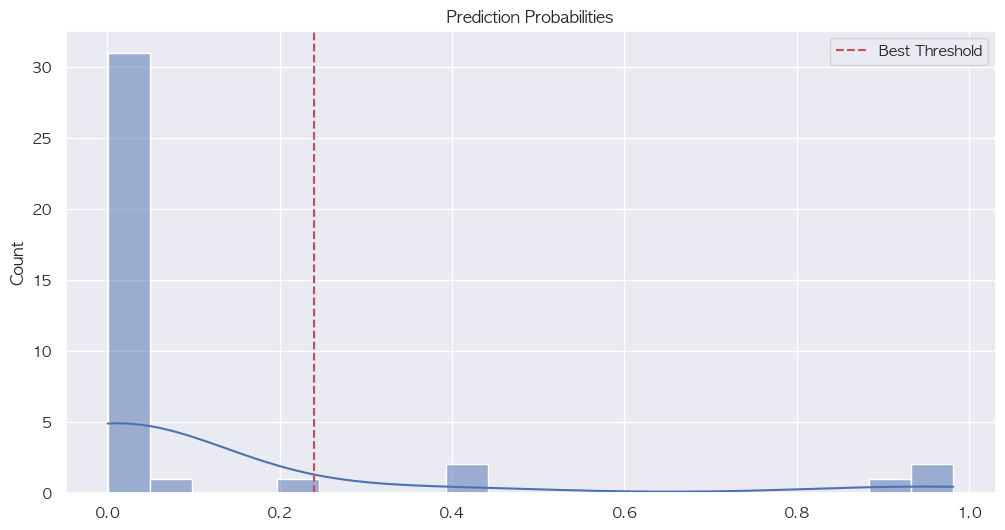

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_probs, bins=20, kde=True)
plt.axvline(0.24, color='r', linestyle='--', label='Best Threshold')
plt.title('Prediction Probabilities')
plt.legend()
plt.show()

### CatBoost 모델 저장

In [110]:
import pickle

# 모델 저장
with open('AB_catboost.dat', 'wb') as f:
    pickle.dump(cb_model, f)

with open('AB_catboost_scaler.dat', 'wb') as f:
    pickle.dump(scaler, f)

In [112]:
with open('AB_LabelEncoder.dat', 'wb') as f:
    pickle.dump(le_y, f)